# Udacity Machine Learning Capstone Project
## Dogs vs. Cats Redux - Kaggle Compeition

## Load modules

In [1]:
import hashlib
import os
import pickle
import time
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
print('All modules imported.')

All modules imported.


## Load Data

In [32]:
SIZE = 128

# Reload the data
pickle_file = 'DogCat_{0}px_2500.pickle'.format(SIZE)
with open(pickle_file, 'rb') as f:
  pickle_data = pickle.load(f)
  X_train = pickle_data['train_dataset']
  y_train = pickle_data['train_labels']
  X_val = pickle_data['valid_dataset']
  y_val = pickle_data['valid_labels']
  del pickle_data  # Free up memory
    
print('Data and modules loaded.')

Data and modules loaded.


In [33]:
print(X_train.shape)
print(X_val.shape)

(2000, 128, 128, 3)
(500, 128, 128, 3)


## Implement 

### Input
This architecture accepts a 128x128xC image as input, where C is the number of color channels. C is 3 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 63x63x32.

**Activation.** Relu activation function.

**Pooling.** The output shape should be 31x31x32.

**Layer 2: Convolutional.** The output shape should be 29x29x32.

**Activation.** Relu activation function.

**Pooling.** The output shape should be 14x14x32.

**Layer 3: Convolutional.** The output shape should be 6x6x64.

**Activation.** Relu activation function.

**Pooling.** The output shape should be 3x3x64.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 

**Layer 4: Fully Connected.** This should have 288 outputs.

**Activation.** Relu

**Layer 5: Drotput.** This should have 144 outputs.

**Layer 6: Fully Connected (Logits).** This should have 2 outputs.

**Activation.** Sigmoid

### Output
Return the result of the last layer.

In [49]:
def CNN(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0.0
    sigma = 0.1
    weights = {
        'wc1': tf.Variable(tf.truncated_normal((3, 3, 3, 32), mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal((3, 3, 32, 64), mean = mu, stddev = sigma)),
        'wc3': tf.Variable(tf.truncated_normal((3, 3, 64, 64), mean = mu, stddev = sigma)),
        'wf1': tf.Variable(tf.truncated_normal((576, 288), mean = mu, stddev = sigma)),
        'wf2': tf.Variable(tf.truncated_normal((288, 144), mean = mu, stddev = sigma)),
        'wf3': tf.Variable(tf.truncated_normal((144, 2), mean = mu, stddev = sigma))
    }
    
    biases = {
        'bc1': tf.Variable(tf.zeros(32)),
        'bc2': tf.Variable(tf.zeros(64)),
        'bc3': tf.Variable(tf.zeros(64)),
        'bf1': tf.Variable(tf.zeros(288)),
        'bf2': tf.Variable(tf.zeros(144)),
        'bf3': tf.Variable(tf.zeros(2))
    }
    # TODO: Layer 1: Convolutional. Input = 128x128x3. Output = 63x63x32.
    conv_layer1 = tf.nn.conv2d(x, weights['wc1'], strides = [1, 2, 2, 1], padding = 'VALID')
    conv_layer1 = tf.nn.bias_add(conv_layer1, biases['bc1'])
    # TODO: Activation.
    conv_layer1 = tf.nn.relu(conv_layer1)
    # TODO: Pooling. Input = 63x63x32. Output = 31x31x32.
    conv_layer1 = tf.nn.max_pool(conv_layer1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 29x29x32.
    conv_layer2 = tf.nn.conv2d(conv_layer1, weights['wc2'], strides = [1, 1, 1, 1], padding = 'VALID')
    conv_layer2 = tf.nn.bias_add(conv_layer2, biases['bc2'])
    
    # TODO: Activation.
    conv_layer2 = tf.nn.relu(conv_layer2)
    # TODO: Pooling. Input = 29x29x32. Output = 14x14x32.
    conv_layer2 = tf.nn.max_pool(conv_layer2, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')

    # TODO: Layer 3: Convolutional. Output = 6x6x64.
    conv_layer3 = tf.nn.conv2d(conv_layer2, weights['wc3'], strides = [1, 2, 2, 1], padding = 'VALID')
    conv_layer3 = tf.nn.bias_add(conv_layer3, biases['bc3'])
    
    
    # TODO: Activation.
    conv_layer3 = tf.nn.relu(conv_layer3)
    # TODO: Pooling. Input = 6x6x64. Output = 3x3x64.
    conv_layer3 = tf.nn.max_pool(conv_layer3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    
#     print(conv_layer3.get_shape())
    # TODO: Flatten. Input = 3x3x64. Output = 576.
    fc0 = flatten(conv_layer3)
#     print(fc0.get_shape())
    
    # TODO: Layer 3: Fully Connected. Input = 576. Output = 288.
    fc1 = tf.add(tf.matmul(fc0, weights['wf1']), biases['bf1'])
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
#     print(fc1.get_shape())

    # TODO: Layer 4: Fully Connected. Input = 288. Output = 144.
    fc2 = tf.add(tf.matmul(fc1, weights['wf2']), biases['bf2'])

    # TODO: Activation.
    fc2 = tf.nn.dropout(fc2, 0.5)

    # TODO: Layer 5: Fully Connected. Input = 144. Output = 2.
    fc3 = tf.add(tf.matmul(fc2, weights['wf3']), biases['bf3'])
    fc3 = tf.sigmoid(fc3)
    logits = fc3
    return logits

## Features and Labels

In [50]:
x = tf.placeholder(tf.float32, (None, SIZE, SIZE, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 2)

## Training Pipeline

In [51]:
EPOCHS = 100
BATCH_SIZE = 128*1
rate = 0.0001

logits = CNN(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

In [52]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model

In [53]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    valid_acc = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        t0 = time.time()
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Time: %.3f seconds" % (time.time() - t0))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        valid_acc.append(validation_accuracy)
        
    saver.save(sess, './DogsCats_CNN')
    print("Model saved")

Training...

EPOCH 1 ...
Time: 18.176 seconds
Validation Accuracy = 0.482

EPOCH 2 ...
Time: 18.238 seconds
Validation Accuracy = 0.498

EPOCH 3 ...
Time: 18.079 seconds
Validation Accuracy = 0.552

EPOCH 4 ...
Time: 18.668 seconds
Validation Accuracy = 0.528

EPOCH 5 ...
Time: 18.342 seconds
Validation Accuracy = 0.542

EPOCH 6 ...
Time: 18.337 seconds
Validation Accuracy = 0.550

EPOCH 7 ...
Time: 18.834 seconds
Validation Accuracy = 0.570

EPOCH 8 ...
Time: 18.235 seconds
Validation Accuracy = 0.548

EPOCH 9 ...
Time: 17.266 seconds
Validation Accuracy = 0.544

EPOCH 10 ...
Time: 20.898 seconds
Validation Accuracy = 0.598

EPOCH 11 ...
Time: 18.676 seconds
Validation Accuracy = 0.538

EPOCH 12 ...
Time: 18.139 seconds
Validation Accuracy = 0.588

EPOCH 13 ...
Time: 19.700 seconds
Validation Accuracy = 0.628

EPOCH 14 ...
Time: 21.563 seconds
Validation Accuracy = 0.614

EPOCH 15 ...
Time: 18.458 seconds
Validation Accuracy = 0.646

EPOCH 16 ...
Time: 18.154 seconds
Validation Accura

The maximum validation accuracy is 0.7260000023841858 at epoch 94


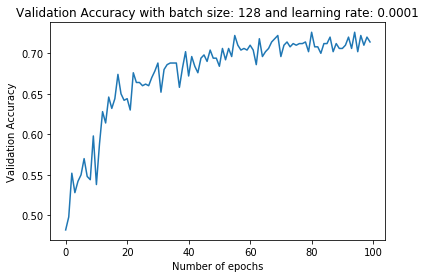

In [54]:
plt.title('Validation Accuracy with batch size: {0} and learning rate: {1}'.format(BATCH_SIZE, rate))
plt.xlabel('Number of epochs')
plt.ylabel('Validation Accuracy')
#plt.xlim([0, EPOCHS])
#plt.ylim([0.5, 1])
plt.plot(valid_acc)
print('The maximum validation accuracy is {0} at epoch {1}'.format(np.max(valid_acc), np.argmax(valid_acc)))

In [ ]:
# # Plot loss and validaction accuracy, take longer to run
# # Measurements use for graphing loss and accuracy
# log_batch_step = 50
# batches = []
# loss_batch = []
# train_acc_batch = []
# valid_acc_batch = []


# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     num_examples = len(X_train)
#     batch_count = int(math.ceil(num_examples/BATCH_SIZE))
    
#     print("Training...")
#     print()
#     for i in range(EPOCHS):
#         X_train, y_train = shuffle(X_train, y_train)
#         X_val, y_val = shuffle(X_val, y_val)
#         # Progress bar
#         batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(i+1, EPOCHS), unit='batches')
        
#          # The training cycle
#         for batch_i in batches_pbar:
#             # Get a batch of training features and labels
#             batch_start = batch_i*BATCH_SIZE
#             batch_features = X_train[batch_start:batch_start + BATCH_SIZE]
#             batch_labels = y_train[batch_start:batch_start + BATCH_SIZE]

#             # Run optimizer and get loss
#             _, l = sess.run(
#                 [training_operation, loss_operation],
#                 feed_dict={x: batch_features, y: batch_labels})

#             # Log every 50 batches
#             if not batch_i % log_batch_step:
#                 # Calculate Training and Validation accuracy
#                 training_accuracy = sess.run(accuracy_operation, feed_dict={x: X_train, y: y_train})
#                 validation_accuracy = sess.run(accuracy_operation, feed_dict={x: X_val, y: y_val})

#                 # Log batches
#                 previous_batch = batches[-1] if batches else 0
#                 batches.append(log_batch_step + previous_batch)
#                 loss_batch.append(l)
#                 train_acc_batch.append(training_accuracy)
#                 valid_acc_batch.append(validation_accuracy)
#     saver.save(sess, './DogsCats_CNN2')
#     print("Model saved")
    
# loss_plot = plt.subplot(211)
# loss_plot.set_title('Loss')
# loss_plot.plot(batches, loss_batch, 'g')
# loss_plot.set_xlim([batches[0], batches[-1]])
# acc_plot = plt.subplot(212)
# acc_plot.set_title('Accuracy')
# acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
# acc_plot.plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
# acc_plot.set_ylim([0, 1.0])
# acc_plot.set_xlim([batches[0], batches[-1]])
# acc_plot.legend(loc=4)
# plt.tight_layout()
# plt.show()